In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train : ",x_train.shape) # 60000 images de 28x28 pixels
print("y_train : ",y_train.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)


In [5]:
single_img = x_train[0] # première image de la base d'entrainement
single_img.shape

(28, 28)

In [6]:
single_img # raw image data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0] # label de l'image

5

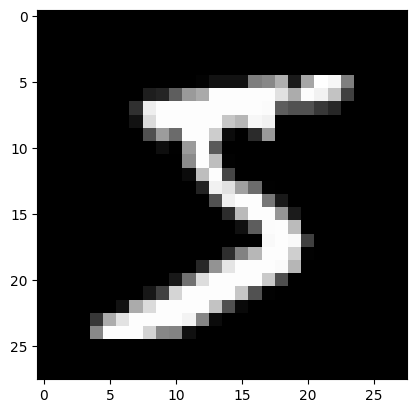

In [8]:
plt.imshow(single_img, cmap='gray') # affichage de l'image en grayscale

In [9]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Lorsque nous avons exploré le jeu de données MNIST, nous avons constaté que les étiquettes étaient représentées par les chiffres eux-mêmes, par exemple, 0, 1, 2, ..., 9. Cependant, dans le contexte d'un problème de classification multi-classe, il est essentiel d'adapter le format des étiquettes pour refléter correctement les catégories.

**Problème avec le Format Actuel**

Actuellement, si nous utilisons ces chiffres comme étiquettes, le réseau neuronal peut interpréter cela comme un problème de régression où il tente de prédire des valeurs continues plutôt que des catégories discrètes. Par exemple, au lieu de prédire simplement "5", le réseau pourrait donner des prédictions comme "5.5" ou "5.6", ce qui n'est pas approprié pour une classification.

**Encodage One-Hot**

Pour remédier à cela, nous devons effectuer ce qu'on appelle un encodage one-hot sur les étiquettes. L'encodage one-hot est une technique où chaque étiquette est représentée par un tableau binaire, avec un seul "1" indiquant la catégorie et le reste des "0" pour les autres catégories.

## Transformation des labels en vecteurs one-hot

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
print(f"Before shape: {y_train.shape}")
print(f"Before first value: {y_train[0]}")
print("-------------------")
y_example = to_categorical(y_train)
print(f"After shape: {y_example.shape}")
print(f"After first value: {y_example[0]}")

Before shape: (60000,)
Before first value: 5
-------------------
After shape: (60000, 10)
After first value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

## Normalisation des données

In [13]:
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28,1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


## Choix des paramètres Couches Convolutionnelles

Lors de la conception de notre réseau neuronal convolutionnel, un choix crucial est le nombre de filtres à utiliser dans les couches convolutionnelles. Le nombre de filtres a un impact significatif sur la capacité du réseau à extraire des caractéristiques pertinentes et à effectuer une classification précise. Voici quelques considérations à prendre en compte lors du choix du nombre de filtres :

**Taille et Complexité du Jeu de Données**

Le nombre de filtres devrait généralement augmenter avec la taille du jeu de données et sa complexité. Si le jeu de données comprend des images de grande taille, une variété d'images et un grand nombre de classes, il est souvent bénéfique d'augmenter le nombre de filtres.

**Taille et Variété des Images**

Des images plus grandes et plus variées nécessitent une capacité de caractérisation plus importante. Augmenter le nombre de filtres permet au réseau de capturer des informations détaillées et des motifs complexes.

**Nombre de Classes**

Plus il y a de classes à classer, plus le nombre de filtres peut être utile. Chaque filtre apprend à détecter des caractéristiques spécifiques, et un ensemble diversifié de filtres peut être nécessaire pour traiter efficacement différentes classes.

**Éviter le Sous-apprentissage**

Un nombre trop faible de filtres peut entraîner un sous-apprentissage, où le réseau n'est pas en mesure de capturer des informations importantes pour effectuer une classification précise. Il est donc important de trouver un équilibre en ajustant le nombre de filtres en fonction des caractéristiques du problème.


Plus notre image est complexe plus il faut rajouter plus de Conv2D et MaxPool2D

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu',)) # 32 filtres de 4x4
model.add(MaxPool2D(pool_size=(2, 2))) # un pooling de taille (2, 2) réduira la taille de l'image à (12, 12).
model.add(Flatten()) # images 2D -> 1D soit 28*28 = 784
model.add(Dense(128, activation='relu')) # 128 neurones
model.add(Dense(10, activation='softmax')) # 10 neurones pour les 10 classes car problème multi-class
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [20]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10


1875/1875 [==============================] - 23s 11ms/step - loss: 0.1445 - accuracy: 0.9574 - val_loss: 0.0615 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0516 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0364 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0452 - val_accuracy: 0.9859


In [21]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

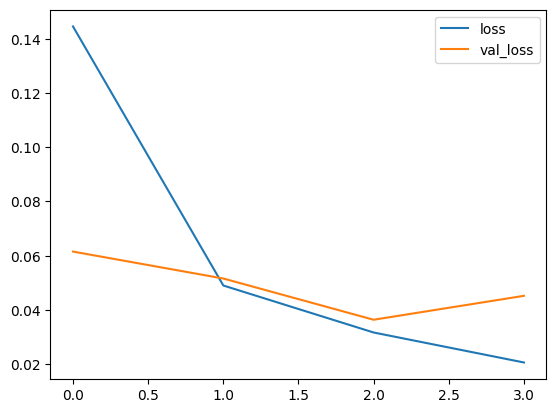

In [22]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

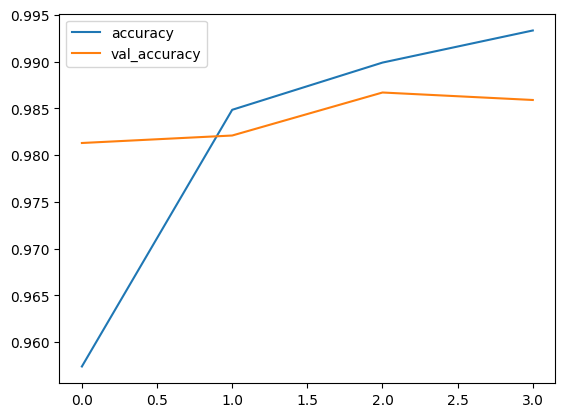

In [23]:
metrics[['accuracy', 'val_accuracy']].plot()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



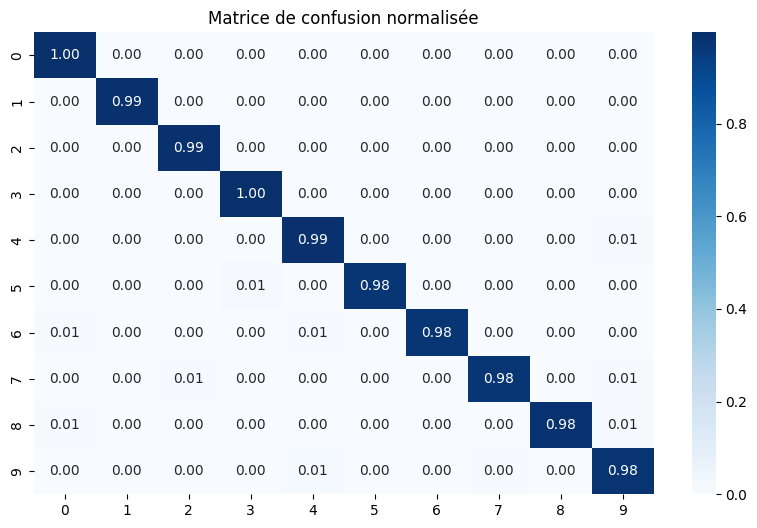

In [26]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, predicted_classes)

# Normaliser la matrice de confusion pour obtenir des pourcentages
cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10,6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice de confusion normalisée")
plt.show()

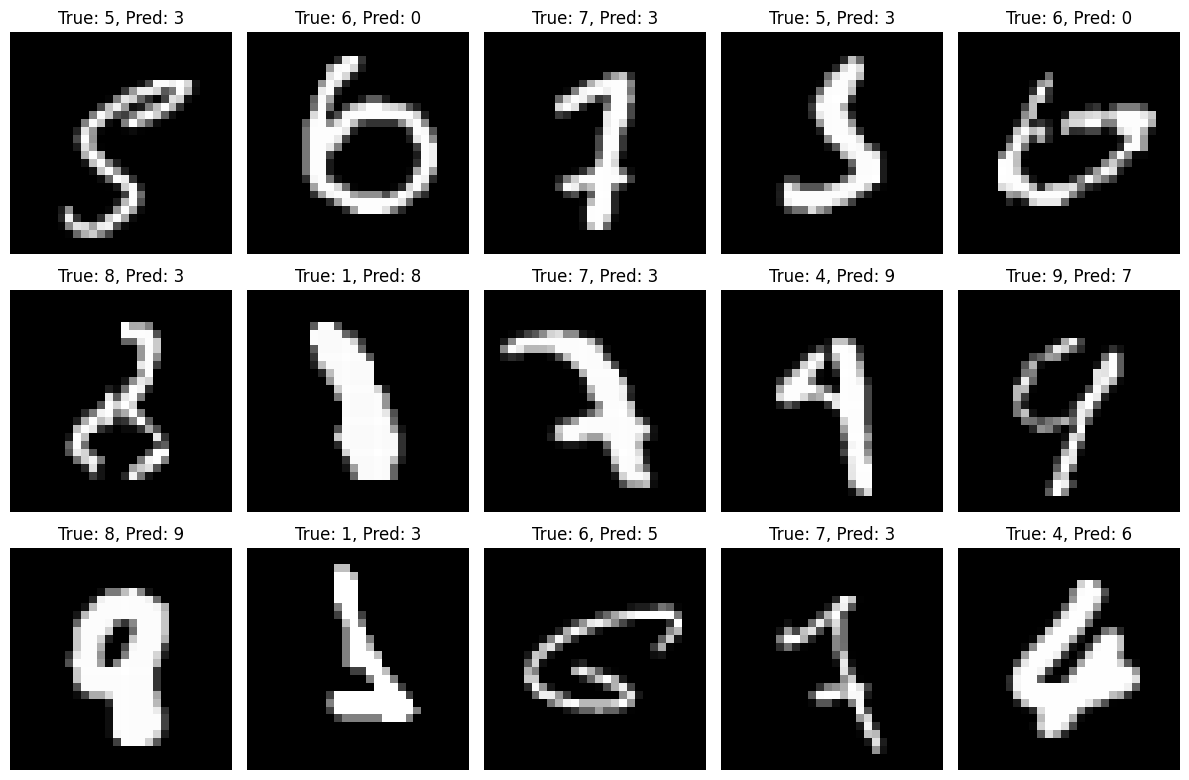

In [27]:
# Trouver les indices des prédictions incorrectes
errors = [i for i in range(len(x_test)) if predicted_classes[i] != y_test[i]]

# Limiter le nombre d'erreurs à afficher
errors = errors[:min(24, len(errors))]

# Afficher les images d'erreur
plt.figure(figsize=(12, 8))
for i, error_idx in enumerate(errors[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[error_idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[error_idx]}, Pred: {predicted_classes[error_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

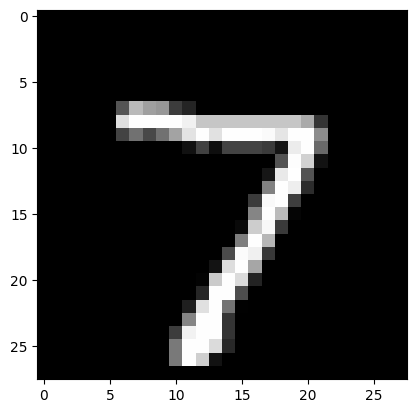

In [28]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [29]:
predictions = model.predict(x_test[0].reshape(1, 28, 28, 1))
predicted_class = np.argmax(predictions)
predicted_class

1/1 [==============================] - 0s 69ms/step


7